In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb

In [2]:
pd.set_option("max_columns", 300)
pd.set_option("max_rows", 300)

In [3]:
train_df = pd.read_csv("../input/train.csv")

In [4]:
test_df = pd.read_csv("../input/test.csv")

In [5]:
train_df.shape, test_df.shape

((33857, 128), (11259, 127))

In [6]:
np.setdiff1d(train_df.columns, test_df.columns)

array(['Salary'], dtype=object)

[]

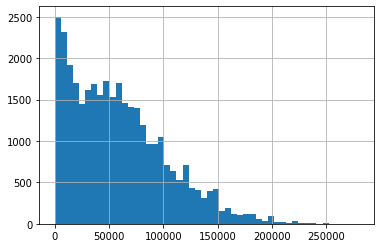

In [7]:
train_df["Salary"].hist(bins=50).plot()

In [8]:
train_df.head()

,No,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,SalaryType,Salary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Nigeria,No,"Independent contractor, freelancer, or self-em...","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",NaN,Database administrator;Designer;Full-stack dev...,18-20 years,6-8 years,Slightly satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Between 1 and 2 years ago,9.0,7.0,8.0,3.0,6.0,10.0,2.0,1.0,5.0,4.0,1.0,10.0,5.0,9.0,11.0,2.0,7.0,6.0,8.0,4.0,3.0,1.0,2.0,4.0,3.0,5.0,1.0,2.0,6.0,3.0,5.0,7.0,4.0,My job status or other personal status changed,U.S. dollars ($),Monthly,10800.0,USD,Facebook;Office / productivity suite (Microsof...,NaN,Taken a part-time in-person course in programm...,The official documentation and/or standards fo...,NaN,NaN,Strongly agree,Strongly disagree,Strongly disagree,PHP;SQL;HTML;CSS,C#;Java;PHP;Python;SQL;HTML;CSS,MySQL,Cassandra;MongoDB;SQL Server;MySQL;MariaDB,Linux;Windows Desktop or Server;WordPress,Android;Linux;Windows Desktop or Server;WordPress,NaN,Angular;.NET Core;Node.js,NetBeans;Visual Studio,Windows,1,Formal standard such as ISO 9001 or IEEE 12207...,NaN,A few times per week,Yes,I'm not sure/I can't remember,NaN,Strongly agree,Somewhat agree,NaN,Saw an online advertisement and then researche...,1.0,4.0,5.0,6.0,2.0,3.0,7.0,Increasing automation of jobs,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, but only within the company",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,A few times per month or weekly,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what that is",NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,5 - 8 hours,Over 4 hours,3 - 4 times per week,NaN,I don't typically exercise,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Blac

In [9]:
train_df.isna().sum()

No                                 0
Hobby                              0
OpenSource                         0
Country                            0
Student                          294
Employment                       116
FormalEducation                  487
UndergradMajor                  3703
CompanySize                     4782
DevType                          233
YearsCoding                       14
YearsCodingProf                  516
JobSatisfaction                 1804
CareerSatisfaction               516
HopeFiveYears                    595
JobSearchStatus                    1
LastNewJob                        66
AssessJob1                      1467
AssessJob2                      1467
AssessJob3                      1467
AssessJob4                      1467
AssessJob5                      1467
AssessJob6                      1467
AssessJob7                      1467
AssessJob8                      1467
AssessJob9                      1467
AssessJob10                     1467
A

In [10]:
train_df.nunique().sort_values().reset_index()

,index,0
0,Hobby,2
1,OpenSource,2
2,MilitaryUS,2
3,Dependents,2
4,EthicalImplications,3
5,AIFuture,3
6,EthicsChoice,3
7,EthicsResponsible,3
8,AdBlockerDisable,3
9,StackOverflowHasAccount,3


In [11]:
train_df.LanguageDesireNextYear

0                       C#;Java;PHP;Python;SQL;HTML;CSS
1                                        Go;Java;Kotlin
2                                               Haskell
3                                        Assembly;C;C++
4        C++;C#;Java;JavaScript;PHP;Python;SQL;HTML;CSS
                              ...                      
33852              C++;Julia;Python;HTML;CSS;Bash/Shell
33853                            Java;JavaScript;Python
33854                           Java;Objective-C;Kotlin
33855                                             Swift
33856               C++;C#;JavaScript;Python;R;HTML;CSS
Name: LanguageDesireNextYear, Length: 33857, dtype: object

In [12]:
train_df.LanguageWorkedWith

0                                         PHP;SQL;HTML;CSS
1                     Go;Groovy;Java;JavaScript;Bash/Shell
2                              C++;JavaScript;SQL;HTML;CSS
3                      Assembly;C;C++;Go;Python;Bash/Shell
4               C#;Java;JavaScript;Lua;PHP;SQL;VB.NET;HTML
                               ...                        
33852    C;C++;JavaScript;Matlab;Python;HTML;CSS;Bash/S...
33853         C;Java;JavaScript;Python;HTML;CSS;Bash/Shell
33854             C#;JavaScript;Python;HTML;CSS;Bash/Shell
33855                    Java;JavaScript;Objective-C;Swift
33856                      C#;JavaScript;Python;R;HTML;CSS
Name: LanguageWorkedWith, Length: 33857, dtype: object

In [13]:
train_df.PlatformDesireNextYear

0        Android;Linux;Windows Desktop or Server;WordPress
1                                                    Linux
2                               Arduino;Linux;Raspberry Pi
3                                                    Linux
4        Arduino;Gaming console;Linux;Mac OS;Windows De...
                               ...                        
33852                                   Linux;Raspberry Pi
33853    Android;AWS;Azure;Google Cloud Platform/App En...
33854                                             Firebase
33855                                          Android;iOS
33856                                                  NaN
Name: PlatformDesireNextYear, Length: 33857, dtype: object

In [14]:
job_cols = [c for c in train_df.columns if "AssessJob" in c]
job_cols

['AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10']

In [15]:
train_df[job_cols]

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10
0,9.0,7.0,8.0,3.0,6.0,10.0,2.0,1.0,5.0,4.0
1,9.0,2.0,1.0,6.0,4.0,8.0,3.0,5.0,10.0,7.0
2,9.0,4.0,6.0,1.0,3.0,5.0,2.0,8.0,10.0,7.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,8.0,10.0,2.0,7.0,9.0,1.0,5.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...
33852,1.0,4.0,2.0,5.0,3.0,8.0,10.0,7.0,9.0,6.0
33853,1.0,2.0,9.0,5.0,6.0,4.0,8.0,7.0,10.0,3.0
33854,4.0,8.0,7.0,3.0,2.0,6.0,5.0,10.0,9.0,1.0
33855,10.0,1.0,9.0,7.0,3.0,5.0,2.0,4.0,6.0,8.0


In [16]:
train_df.YearsCoding.value_counts()

6-8 years           7274
3-5 years           7028
9-11 years          4985
12-14 years         3539
15-17 years         2731
0-2 years           2248
18-20 years         2241
30 or more years    1383
21-23 years         1170
24-26 years          811
27-29 years          433
Name: YearsCoding, dtype: int64

In [17]:
train_df.SalaryType.value_counts()

Yearly     15961
Monthly    12726
Weekly       819
Name: SalaryType, dtype: int64

In [18]:
train_df.CareerSatisfaction.value_counts()

Moderately satisfied                  12878
Extremely satisfied                    6430
Slightly satisfied                     5924
Slightly dissatisfied                  2795
Moderately dissatisfied                2237
Neither satisfied nor dissatisfied     2113
Extremely dissatisfied                  964
Name: CareerSatisfaction, dtype: int64

In [19]:
train_df.groupby("DevType")["Salary"].mean()

DevType
Back-end developer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   64859.386441
Back-end developer;C-suite executive (CEO, CTO, etc.)                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [20]:
train_df[train_df.Currency == "U.S. dollars ($)"]["Salary"].median()

88000.0

In [21]:
train_df[train_df.Currency == "Japanese yen (¥)"]["Salary"].median()

45201.5

In [22]:
train_df[train_df.Employment.fillna("").str.contains("Not")]

,No,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,SalaryType,Salary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
17,18,Yes,No,Switzerland,"Yes, part-time","Not employed, but looking for work","Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",NaN,Student,0-2 years,NaN,NaN,NaN,NaN,I am actively looking for a job,Less than a year ago,9.0,10.0,4.0,5.0,7.0,1.0,6.0,3.0,2.0,8.0,3.0,11.0,4.0,7.0,2.0,9.0,10.0,6.0,5.0,8.0,1.0,4.0,1.0,2.0,5.0,3.0,1.0,3.0,5.0,2.0,6.0,7.0,4.0,A recruiter contacted me,Swiss francs,Monthly,62556.0,CHF,NaN,NaN,Taken an online course in programming or softw...,NaN,Less than a month,NaN,Strongly disagree,Neither Agree nor Disagree,Neither Agree nor Disagree,JavaScript;PHP;SQL;HTML;CSS,NaN,MongoDB;MySQL,MongoDB,Mac OS;Firebase,Mac OS,Node.js,Angular;Node.js,Atom;Sublime Text;Visual Studio,MacOS,1,Agile;Scrum,Git,Never,I'm not sure/I don't know,NaN,NaN,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Clicked on an online advertisement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,Unsure / I don't know,10 (Very Likely),A few times per month or weekly,Yes,I have never participated in Q&A on Stack Over...,Yes,"No, and I don't know what that is",10 (Very Likely),Yes,Somewhat interested,Very interested,Very interested,Extremely interested,Extremely interested,Between 7:01 - 8:00 AM,Over 12 hours,3 - 4 hours,1 - 2 times per week,Standing desk,Daily or almost every day,Female,Straight or heterosexual,NaN,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Neither easy nor difficult
58,59,Yes,Yes,United States,No,"Not employed, but looking for work",NaN,NaN,NaN,Back-end developer;Front-end developer;Full-st...,0-2 years,0-2 years,NaN,Moderately satisfied,Doing the same work,I am actively looking for a job,Less than a year ago,1.0,4.0,2.0,3.0,5.0,9.0,8.0,7.0,10.0,6.0,1.0,3.0,4.0,8.0,9.0,5.0,10.0,6.0,7.0,11.0,2.0,1.0,2.0,4.0,5.0,3.0,5.0,1.0,3.0,2.0,6.0,7.0,4.0,My job status or other personal status changed,U.S. dollars ($),Monthly,0.0,USD,NaN,NaN,Participated in a full-time developer training...,NaN,I

In [23]:
[c for c in train_df.columns if "float" in train_df[c].dtype.name]

['AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'Salary',
 'AdsPriorities1',
 'AdsPriorities2',
 'AdsPriorities3',
 'AdsPriorities4',
 'AdsPriorities5',
 'AdsPriorities6',
 'AdsPriorities7']

[]

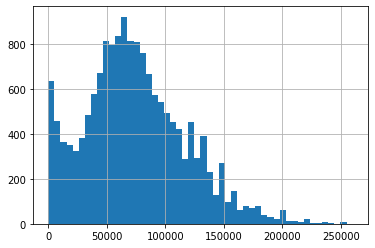

In [24]:
train_df[train_df.SalaryType == "Yearly"]["Salary"].hist(bins=50).plot()

[]

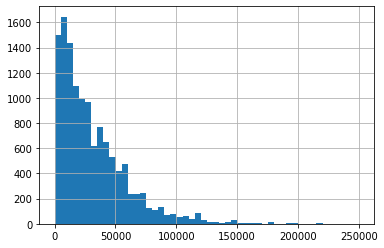

In [25]:
train_df[train_df.SalaryType == "Monthly"]["Salary"].hist(bins=50).plot()

[]

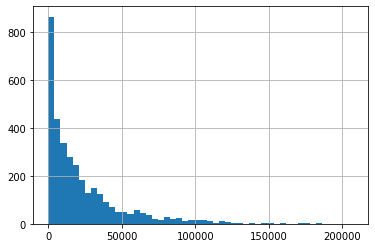

In [26]:
train_df[train_df.DevType.fillna("").str.contains("Student")]["Salary"].hist(bins=50).plot()

[]

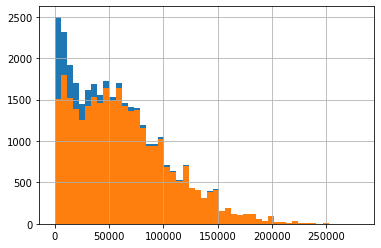

In [27]:
train_df["Salary"].hist(bins=50).plot()
train_df[~train_df.DevType.fillna("").str.contains("Student")]["Salary"].hist(bins=50).plot()

<ipython-input-28-8abaa541e308>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[~train_df.DevType.fillna("").str.contains("Student")][train_df.SalaryType == "Yearly"]["Salary"].hist(bins=50).plot()


[]

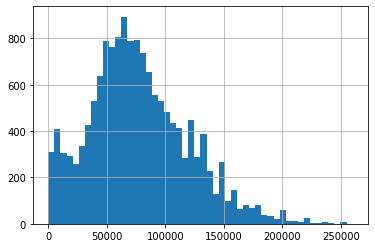

In [28]:
train_df[~train_df.DevType.fillna("").str.contains("Student")][train_df.SalaryType == "Yearly"]["Salary"].hist(bins=50).plot()

<ipython-input-29-7535f6a660b8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[


[]

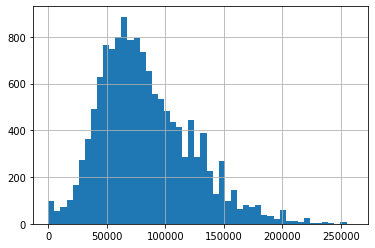

In [29]:
train_df[
    ~train_df.DevType.fillna("").str.contains("Student")
][train_df.SalaryType == "Yearly"
 ][
    train_df["Age"] != "Under 18 years old"
][
    train_df["CurrencySymbol"] != "INR"
]["Salary"].hist(bins=50).plot()

[]

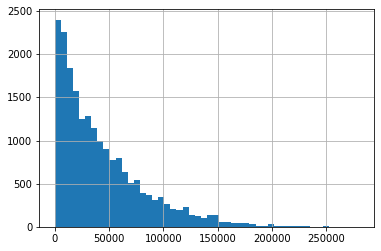

In [30]:
train_df[
    (train_df.DevType.fillna("").str.contains("Student"))
    | (train_df.SalaryType != "Yearly")
    | (train_df["Age"] == "Under 18 years old")
    | (train_df["CurrencySymbol"] == "INR")
]["Salary"].hist(bins=50).plot()

[]

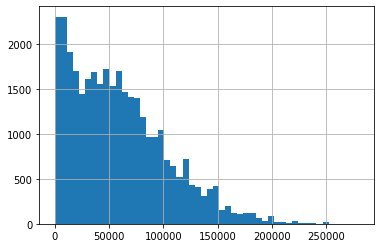

In [31]:
train_df[
    train_df["Age"] != "Under 18 years old"
]["Salary"].hist(bins=50).plot()

<ipython-input-32-10dabd0b552d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[


[]

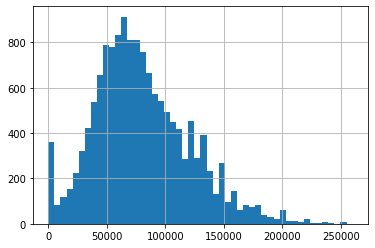

In [32]:
train_df[
    train_df.SalaryType == "Yearly"
][
    train_df["CurrencySymbol"] != "INR"
]["Salary"].hist(bins=50).plot()

In [33]:
train_df[
    ~train_df.DevType.fillna("").str.contains("Student")
][train_df.SalaryType == "Yearly"
 ][
    train_df["Student"] == "No"
][
    train_df["Age"] != "Under 18 years old"
].groupby("Currency")["Salary"].mean()

<ipython-input-33-baf7564b2826>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[


Currency
Australian dollars (A$)         83289.716567
Bitcoin (btc)                   54103.428571
Brazilian reais (R$)            37595.724138
British pounds sterling (£)     67140.286756
Canadian dollars (C$)           69495.325638
Chinese yuan renminbi (¥)       45313.850000
Danish krone (kr)               99535.371429
Euros (€)                       63383.622868
Indian rupees (₹)               17089.238227
Japanese yen (¥)                67153.341463
Mexican pesos (MXN$)            25258.444444
Norwegian krone (kr)            86880.918367
Polish złoty (zł)               55438.307692
Russian rubles (₽)              16461.800000
Singapore dollars (S$)          56475.608696
South African rands (R)         59464.464286
Swedish kroner (SEK)            76433.675676
Swiss francs                   109201.630952
U.S. dollars ($)               102316.084372
Name: Salary, dtype: float64

In [34]:
train_df.Student.value_counts()

No                27472
Yes, full-time     4038
Yes, part-time     2053
Name: Student, dtype: int64

In [35]:
train_df[
    ~train_df.DevType.fillna("").str.contains("Student")
][train_df.SalaryType == "Yearly"
 ][
    train_df["Employment"] != "Not employed, but looking for work"
][train_df["Salary"] < 1000]

<ipython-input-35-f100dc6d81d3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[
<ipython-input-35-f100dc6d81d3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df[


,No,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,SalaryType,Salary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
575,576,Yes,No,Portugal,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Back-end developer;Front-end developer;Full-st...,18-20 years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,"I’m not actively looking, but I am open to new...",More than 4 years ago,7.0,3.0,10.0,5.0,9.0,2.0,1.0,4.0,8.0,6.0,2.0,8.0,1.0,6.0,10.0,5.0,4.0,3.0,7.0,11.0,9.0,5.0,2.0,1.0,3.0,4.0,6.0,3.0,4.0,2.0,1.0,5.0,7.0,I saw an employer’s advertisement,Euros (€),Yearly,24.0,EUR,"Other wiki tool (Github, Google Sites, proprie...",One to three months,Taken an online course in programming or softw...,NaN,NaN,NaN,Agree,Agree,Disagree,C#;JavaScript;TypeScript;HTML;CSS;Bash/Shell,NaN,SQL Server,NaN,Android;Azure;WordPress,NaN,Angular;.NET Core,NaN,Visual Studio;Visual Studio Code,Windows,2,Pair programming,Git,Multiple times per day,No,NaN,NaN,Neither agree nor disagree,Somewhat disagree,Somewhat agree,Stopped going to a website because of their ad...,4.0,1.0,2.0,5.0,6.0,7.0,3.0,Algorithms making important decisions,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",The developer who wrote it,Yes,10 (Very Likely),Daily or almost daily,Yes,A few times per month or weekly,Yes,"No, I know what it is but I don't have one",9,Yes,Somewhat interested,Not at all interested,Somewhat interested,A little bit interested,Very interested,Between 6:01 - 7:00 AM,9 - 12 hours,30 - 59 minutes,1 - 2 times per week,Wrist/hand supports or braces,3 - 4 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,35 - 44 years old,No,NaN,The survey was too long,Very easy
665,666,No,No,India,No,Employed full-time,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",Mathematics or statistics,Fewer than 10 employees,"C-suite executiv

In [36]:
train_df["nan_num"] = train_df.isna().sum(axis=1)

In [37]:
train_df.groupby("Currency")["Salary"].min()

Currency
Australian dollars (A$)        0.0
Bitcoin (btc)                  0.0
Brazilian reais (R$)           0.0
British pounds sterling (£)    0.0
Canadian dollars (C$)          0.0
Chinese yuan renminbi (¥)      0.0
Danish krone (kr)              0.0
Euros (€)                      0.0
Indian rupees (₹)              0.0
Japanese yen (¥)               0.0
Mexican pesos (MXN$)           0.0
Norwegian krone (kr)           0.0
Polish złoty (zł)              0.0
Russian rubles (₽)             0.0
Singapore dollars (S$)         0.0
South African rands (R)        0.0
Swedish kroner (SEK)           0.0
Swiss francs                   0.0
U.S. dollars ($)               0.0
Name: Salary, dtype: float64

In [38]:
train_df.groupby("Currency")["Salary"].max()

Currency
Australian dollars (A$)        207931.0
Bitcoin (btc)                  178587.0
Brazilian reais (R$)           115409.0
British pounds sterling (£)    251750.0
Canadian dollars (C$)          201303.0
Chinese yuan renminbi (¥)      155834.0
Danish krone (kr)              221894.0
Euros (€)                      232080.0
Indian rupees (₹)              140892.0
Japanese yen (¥)               166571.0
Mexican pesos (MXN$)           112140.0
Norwegian krone (kr)           191285.0
Polish złoty (zł)              158796.0
Russian rubles (₽)             122050.0
Singapore dollars (S$)         175635.0
South African rands (R)        158220.0
Swedish kroner (SEK)           174664.0
Swiss francs                   212710.0
U.S. dollars ($)               280000.0
Name: Salary, dtype: float64

[]

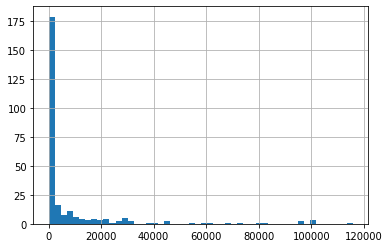

In [39]:
train_df[train_df.Age == "Under 18 years old"]["Salary"].hist(bins=50).plot()

In [40]:
train_df.CurrencySymbol.value_counts().iloc[:10]

USD    10774
EUR     7594
INR     2849
GBP     2597
CAD     1407
AUD      829
RUB      828
BRL      779
PLN      676
SEK      510
Name: CurrencySymbol, dtype: int64

[]

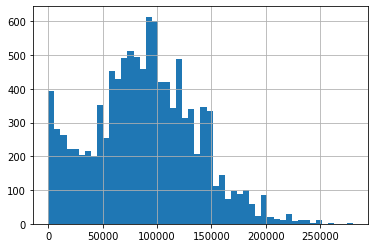

In [41]:
train_df[train_df.CurrencySymbol == "USD"]["Salary"].hist(bins=50).plot()

[]

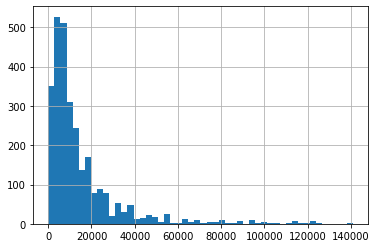

In [42]:
train_df[train_df.CurrencySymbol == "INR"]["Salary"].hist(bins=50).plot()

In [43]:
train_df["Country"].value_counts()

United States                                9126
India                                        2915
United Kingdom                               2553
Germany                                      2405
Canada                                       1430
France                                        994
Russian Federation                            886
Australia                                     832
Brazil                                        802
Netherlands                                   712
Poland                                        692
Spain                                         663
Sweden                                        516
Italy                                         489
Switzerland                                   410
Ukraine                                       326
Israel                                        316
Belgium                                       286
Austria                                       284
Turkey                                        272


In [44]:
train_df["YearsCodingProf"].value_counts()

3-5 years           9416
0-2 years           8282
6-8 years           5304
9-11 years          3677
12-14 years         2062
15-17 years         1465
18-20 years         1384
21-23 years          641
30 or more years     521
24-26 years          373
27-29 years          216
Name: YearsCodingProf, dtype: int64

In [45]:
train_df["CurrencySymbol"].value_counts()

USD    10774
EUR     7594
INR     2849
GBP     2597
CAD     1407
AUD      829
RUB      828
BRL      779
PLN      676
SEK      510
CHF      407
ILS      279
ZAR      261
DKK      260
MXN      233
NOK      224
TRY      218
CZK      212
CNY      191
NZD      181
IRR      181
PKR      171
ARS      132
UAH      124
HUF      122
JPY      113
SGD      113
IDR      108
BDT      108
RON      107
COP       81
LKR       77
PHP       76
BGN       73
MYR       69
NGN       67
HKD       56
EGP       50
CLP       50
TWD       44
KRW       40
HRK       39
THB       39
NPR       38
VND       35
AED       30
RSD       29
KZT       26
BTC       25
BYN       23
KES       19
DOP       17
TND       16
MAD       16
AMD       14
JOD       14
BAM       13
SAR       12
PEN       12
ETB       11
DZD       11
GHS       11
ISK       10
GEL        7
AZN        7
UGX        6
MDL        6
ALL        6
KWD        6
MKD        6
XAF        5
BOB        5
GTQ        5
MUR        5
MZN        4
UYU        4
XOF        4

In [46]:
train_df["SalaryType"].value_counts()

Yearly     15961
Monthly    12726
Weekly       819
Name: SalaryType, dtype: int64

In [47]:
train_df["Employment"].value_counts()

Employed full-time                                      27890
Independent contractor, freelancer, or self-employed     2825
Employed part-time                                       1664
Not employed, but looking for work                        896
Not employed, and not looking for work                    448
Retired                                                    18
Name: Employment, dtype: int64

[]

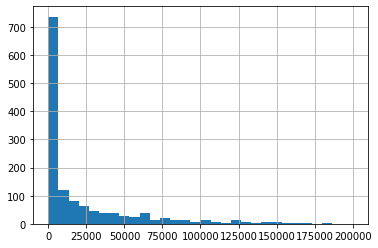

In [48]:
train_df[train_df["Employment"].fillna("").str.contains("Not")]["Salary"].hist(bins=30).plot()

[]

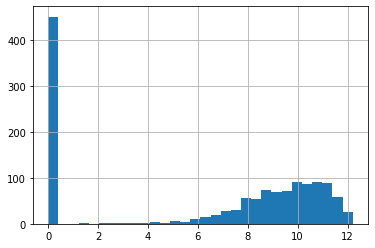

In [49]:
train_df[train_df["Employment"].fillna("").str.contains("Not")]["Salary"].map(np.log1p).hist(bins=30).plot()

[]

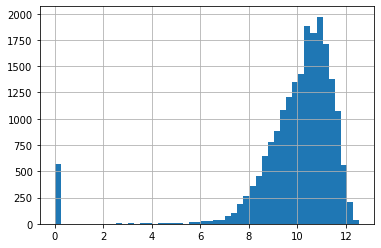

In [50]:
train_df[
    (train_df.DevType.fillna("").str.contains("Student"))
    | (train_df.SalaryType != "Yearly")
    | (train_df["Age"] == "Under 18 years old")
    | (train_df["CurrencySymbol"] == "INR")
]["Salary"].map(np.log1p).hist(bins=50).plot()

[]

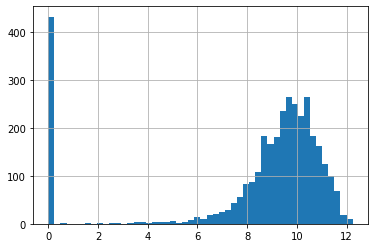

In [51]:
train_df[
    (
    train_df.DevType.fillna("").str.contains("Student"))
    #| (train_df.SalaryType != "Yearly")
    #| (train_df["Age"] == "Under 18 years old")
    #| (train_df["CurrencySymbol"] == "INR")
]["Salary"].map(np.log1p).hist(bins=50).plot()

[]

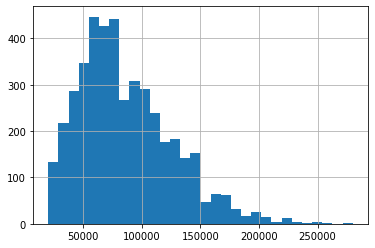

In [53]:
train_df[train_df["SalaryType"].isna()]["Salary"].hist(bins=30).plot()

[]

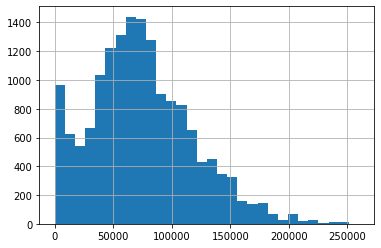

In [55]:
train_df[train_df["SalaryType"] == "Yearly"]["Salary"].hist(bins=30).plot()

In [56]:
test_df.isna().sum()

No                                 0
Hobby                              0
OpenSource                         0
Country                            0
Student                           84
Employment                        29
FormalEducation                  160
UndergradMajor                  1305
CompanySize                     1553
DevType                           78
YearsCoding                        2
YearsCodingProf                  198
JobSatisfaction                  620
CareerSatisfaction               198
HopeFiveYears                    229
JobSearchStatus                    0
LastNewJob                        19
AssessJob1                       529
AssessJob2                       529
AssessJob3                       529
AssessJob4                       529
AssessJob5                       529
AssessJob6                       529
AssessJob7                       529
AssessJob8                       529
AssessJob9                       529
AssessJob10                      529
A